In [1]:
from IPython.display import HTML, display, Image

from scipy import stats
import statsmodels.stats.diagnostic
import statsmodels.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)

#### 1.1 - 1.2

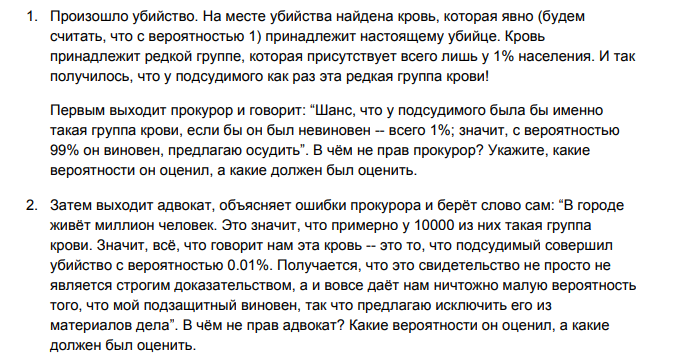

In [2]:
display(Image(r"C:\Users\Admin\Desktop\made\Semester 2\Advanced ML\HW1\1.png", width = 800)) 

Пусть G - событие что подсудимый виновен, I - невиновен, B - событие кровь на месте убийства именно того редкого типа

Тогда в целом нас всех интересует вероятность P(G|B) = 1 - P(I|B)

Прокурор совершает ошибку, когда предполагает, что P(I|B) = P(B|I) и дальше преобразует это к виду 1 - P(B|I)

(Вообще говоря, странная формулировка "шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен" - это факт, что у него именно такая группа крови, но полагаю, что имелось в виду, что он говорит про P(B|I) = 0.01

То есть, если он невиновен, то в целом и без него другой убийца с такой вероятностью имеет именно ту редкую группу крови (да, если считать, что популяция конечна, то нужно вычитать его из числителя и знаменателя и пересчитать долю, но значения всё равно очень близки и опустим это здесь)

В то же время, P(B|G) = 1, очевидно, если он убийца - именно такая группа крови и будет

Тогда судья утверждает, P(G|B) = 1 - P(I|B) = 1 - P(B|I) = 0.99

Это, конечно, неправда - по сути, он таким образом нашёл P(~B|I), что вообще лишено смысла в данной задаче

Берём вводные из второго пункта - prior'ы равны соответсвенно

P(G) = 1/1000000 и P(I) = 999999/1000000

потому что P(I|B) = P(B|I)P(I)/P(B) = P(B|I)P(I)/[ P(B|I)P(I) + P(B|G)P(G)]=

= 0.01 * 999999/1000000 / (0.01 * 999999/1000000 + 1 * 1/1000000) = 0.9999000098990201

То есть, с всё еще очень большой вероятностью он невиновен даже при условии совпадения типов крови

О чём примерно и говорит адвокат, когда берёт вероятность равномерного выбора именно этого подозреваемого равномерно среди всех жителей с такой группой крови

Однако, он обсфусцирует также то, что его вероятность быть виновным P(G|B) = 1 - P(I|B) выросла с prior в 1e-6 до примерно 1e-4, то есть в 100 раз

Дело ещё в том, что при дополнительных уликах или при другом prior относительно именно этого подсудимого (здесь неизвестно как именно он оказался подсудимым, возможно, он не был выбран случайно среди всего миллиона жителей) вероятность может быть уточнена, но здесь данных этих нет

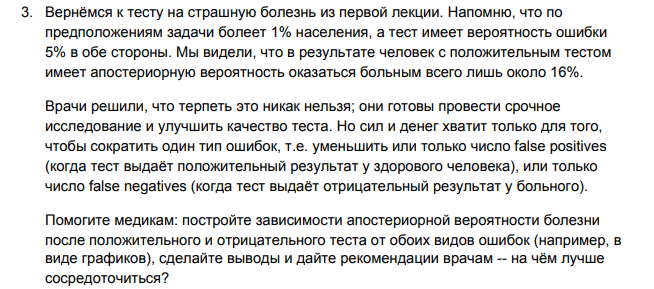

In [3]:
display(Image(r"C:\Users\Admin\Desktop\made\Semester 2\Advanced ML\HW1\1-3.png", width = 800)) 

In [4]:
p_d = 0.01 ## prior probability of disease - rate of disease cases in population
p_fp = 0.05 ## probability of false positive error - p(t is positive | no disease)
p_fn = 0.05 ## probability of false negative error - p(t is negative | disease)

def p_disease_conditional_test_positive(p_d = 0.01, p_fp = 0.05, p_fn = 0.05):
    ### p(d|t) = p(d & t)/p(t) = [p(t|d) * p(d)] / [ p(t|d) * p(d) +  p(t|~d) * p(~d)]
    return ((1 - p_fn) * p_d) / ((1 - p_fn) * p_d + p_fp * (1 - p_d))

def p_disease_conditional_test_negative(p_d = 0.01, p_fp = 0.05, p_fn = 0.05):
    ### p(d|~t) = p(d & ~t)/p(~t) = [p(~t|d) * p(d)] / [ p(~t|d) * p(d) +  p(~t|~d) * p(~d)]
    return (p_fn * p_d) / (p_fn * p_d + (1 - p_fp) * (1 - p_d))

p_disease_conditional_test_positive(p_d, p_fp, p_fn), p_disease_conditional_test_negative(p_d, p_fp, p_fn)

(0.16101694915254236, 0.0005313496280552604)

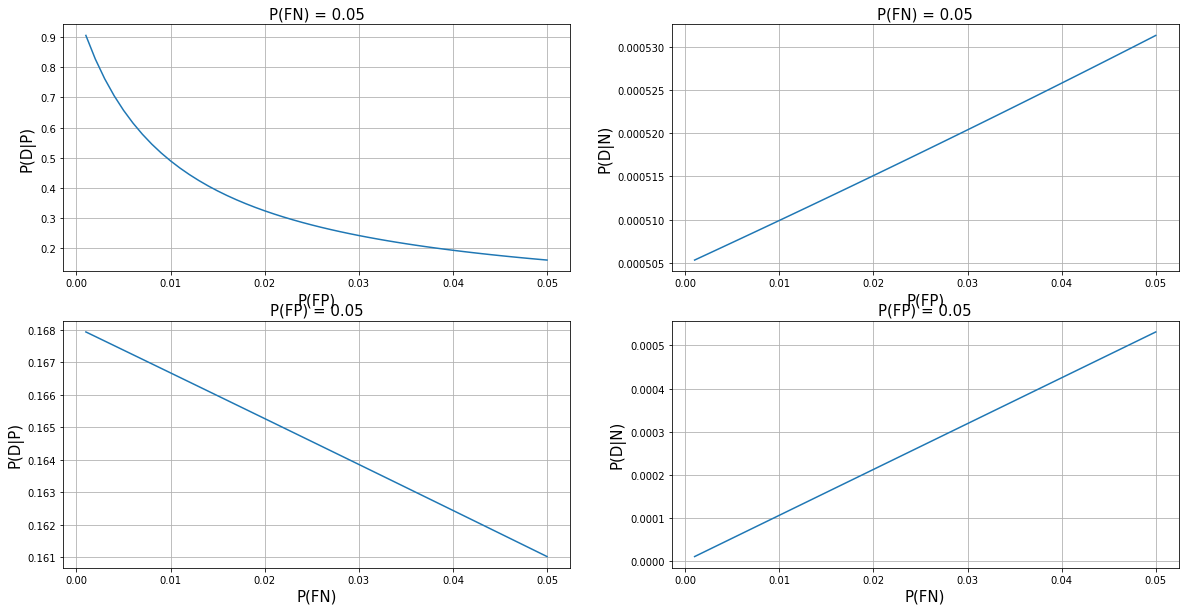

In [5]:
p_d = 0.01
fps = np.arange(0.001, 0.051, 0.001)
fns = np.arange(0.001, 0.051, 0.001)

fig, ax = plt.subplots(2, 2, figsize = (20, 10))
fontsize = 15


p_fn = 0.05
posterior_test_positive = []
posterior_test_negative = []

for p_fp in fps:
    posterior_test_positive.append(p_disease_conditional_test_positive(p_d, p_fp, p_fn))
    posterior_test_negative.append(p_disease_conditional_test_negative(p_d, p_fp, p_fn))


ax[0][0].plot(fps, posterior_test_positive)
ax[0][0].set_xlabel('P(FP)', size = fontsize)
ax[0][0].set_ylabel('P(D|P)', size = fontsize)
ax[0][0].set_title(f'P(FN) = {p_fn:.2f}', size = fontsize)
ax[0][0].grid();

ax[0][1].plot(fps, posterior_test_negative)
ax[0][1].set_xlabel('P(FP)', size = fontsize)
ax[0][1].set_ylabel('P(D|N)', size = fontsize)
ax[0][1].set_title(f'P(FN) = {p_fn:.2f}', size = fontsize)
ax[0][1].grid();


p_fp = 0.05
posterior_test_positive = []
posterior_test_negative = []

for p_fn in fns:
    posterior_test_positive.append(p_disease_conditional_test_positive(p_d, p_fp, p_fn))
    posterior_test_negative.append(p_disease_conditional_test_negative(p_d, p_fp, p_fn))


ax[1][0].plot(fns, posterior_test_positive)
ax[1][0].set_xlabel('P(FN)', size = fontsize)
ax[1][0].set_ylabel('P(D|P)', size = fontsize)
ax[1][0].set_title(f'P(FP) = {p_fp:.2f}', size = fontsize)
ax[1][0].grid();

ax[1][1].plot(fns, posterior_test_negative)
ax[1][1].set_xlabel('P(FN)', size = fontsize)
ax[1][1].set_ylabel('P(D|N)', size = fontsize)
ax[1][1].set_title(f'P(FP) = {p_fp:.2f}', size = fontsize)
ax[1][1].grid();

# plt.tight_layout();

Таким образом, в области интереса (0-0.05) снижение FP гораздо сильнее драйвит рост P(D|P), тогда как P(D|N) практически не изменяется

Для FN обратная картина - P(D|N) падает линейно с коэффициентом близким к 0.1, а  P(D|P) не меняется ощутимо сильно и всё так же в малоинформативном диапазоне около 0.16

Но выбор зависит от конкретной болезни и стоимости теста - если он дорогой и повторное тестирование для того, чтобы убедиться есть болезнь или нет затратно, то нужно уменьшать FP

Если же человек очень быстро умирает, если пропустить болезнь с негативным тестом и/или она очень заразна, нужно уменьшать FN

###### дополнительно можно посмотреть в 3d, но тут в данной области окололинейные эффекты гораздо меньшего масштаба вообще кажутся константными относительно второго фактора

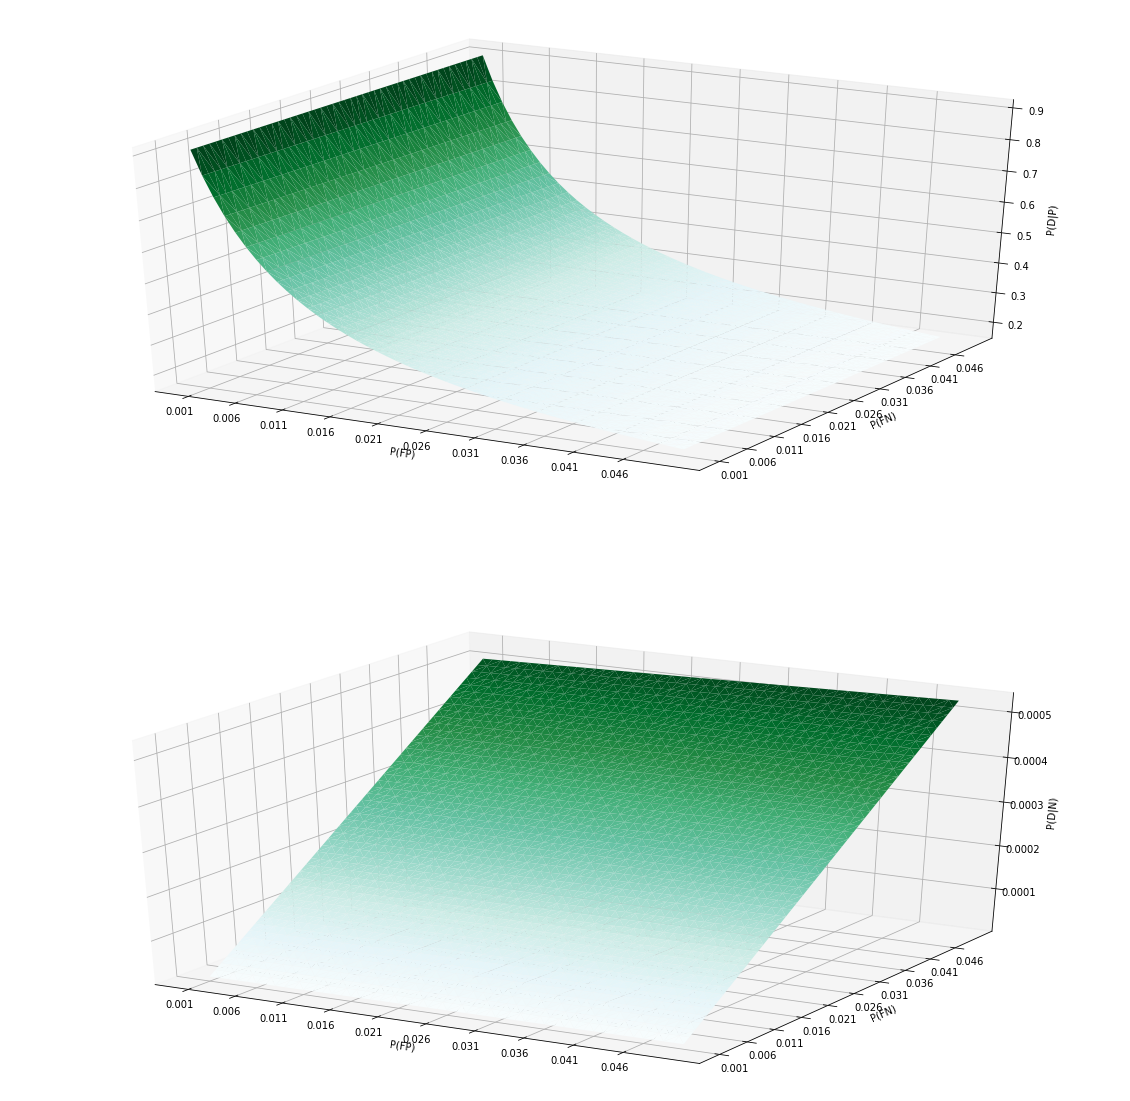

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches

p_d = 0.01

fps = np.arange(0.001, 0.051, 0.001)
fns = np.arange(0.001, 0.051, 0.001)

fp_grid, fn_grid = np.meshgrid(fps, fns)
fp_grid, fn_grid = fp_grid.reshape(-1), fn_grid.reshape(-1)

posterior_test_positive = []
posterior_test_negative = []

for p_fp, p_fn in tqdm(zip(fp_grid, fn_grid), total = len(fp_grid)):
    posterior_test_positive.append(p_disease_conditional_test_positive(p_d, p_fp, p_fn))
    posterior_test_negative.append(p_disease_conditional_test_negative(p_d, p_fp, p_fn))
    
fig = plt.figure(figsize = (20, 20))
# ax[0] = plt.axes()
for i, results in zip([1,2],[posterior_test_positive, posterior_test_negative]):
    ax = fig.add_subplot(2, 1, i, projection='3d')
    ax.view_init(30, -60)

    ax.set_xlabel('P(FP)', size = 10)
    ax.set_xticks(fps[::5])
    ax.set_ylabel('P(FN)', size = 10)
    ax.set_yticks(fns[::5])
    ax.set_zlabel('P(D|P)' if i == 1 else 'P(D|N)', size = 10, rotation = 90)

    _ = ax.plot_trisurf(fp_grid, fn_grid, results,
                        cmap='BuGn', edgecolor = 'none')
#     plt.tight_layout()

#### 2

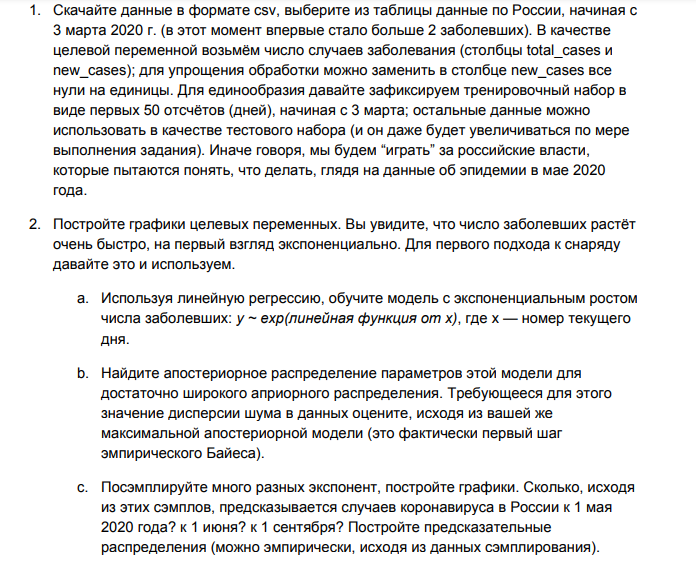

In [7]:
display(Image(r"C:\Users\Admin\Desktop\made\Semester 2\Advanced ML\HW1\2.png", width = 800)) 

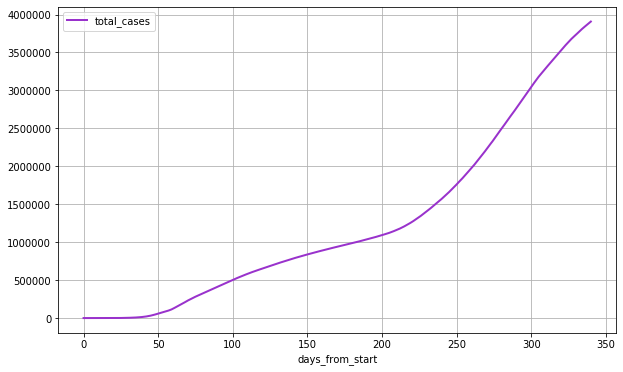

In [8]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\made\Semester 2\Advanced ML\HW1\owid-covid-data.csv")

data = data.query("location == 'Russia' and date >= '2020-03-03'")[['date', 'new_cases', 'total_cases']]
data['days_from_start'] = (pd.to_datetime(data['date']) - pd.to_datetime('2020-03-03')).dt.days
assert min(data['days_from_start']) >= 0

fig, ax = plt.subplots(figsize = (10,6))
data.plot(x = 'days_from_start', y = 'total_cases', linewidth = 2, ax = ax, color = 'darkorchid');
plt.grid();

train_data = data.query("days_from_start <= 50").reset_index(drop = True)
test_data = data.query("days_from_start > 50").reset_index(drop = True)

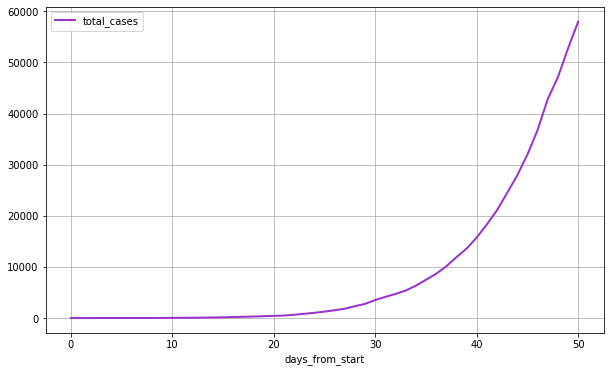

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
train_data.plot(x = 'days_from_start', y = 'total_cases', linewidth = 2, ax = ax, color = 'darkorchid');
plt.grid();

y ~ exp(ax + b)  <=> ln(y) ~ ax + b

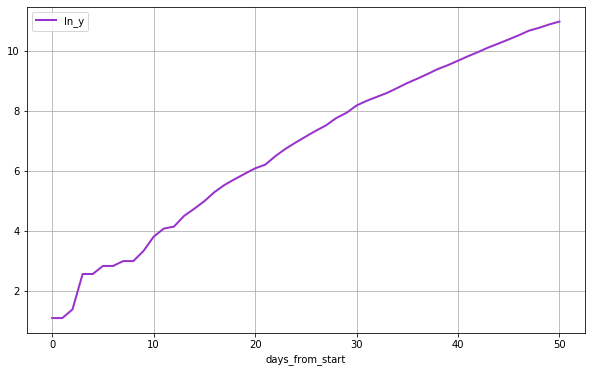

In [10]:
shift = 0 if max(train_data['total_cases']) else 1
train_data['ln_y'] = np.log(train_data['total_cases'] + shift)
test_data['ln_y'] = np.log(test_data['total_cases'] + shift)

fig, ax = plt.subplots(figsize = (10,6))
train_data.plot(x = 'days_from_start', y = 'ln_y', linewidth = 2, ax = ax, color = 'darkorchid');
plt.grid();

######  simple linear regression

alpha: 1.8490840448339725, beta: 0.19655538808797077


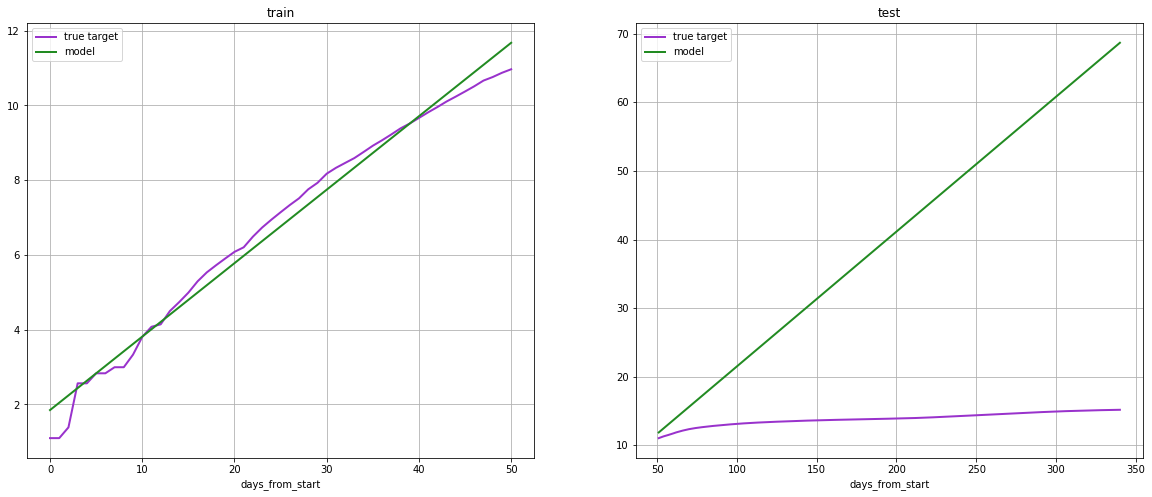

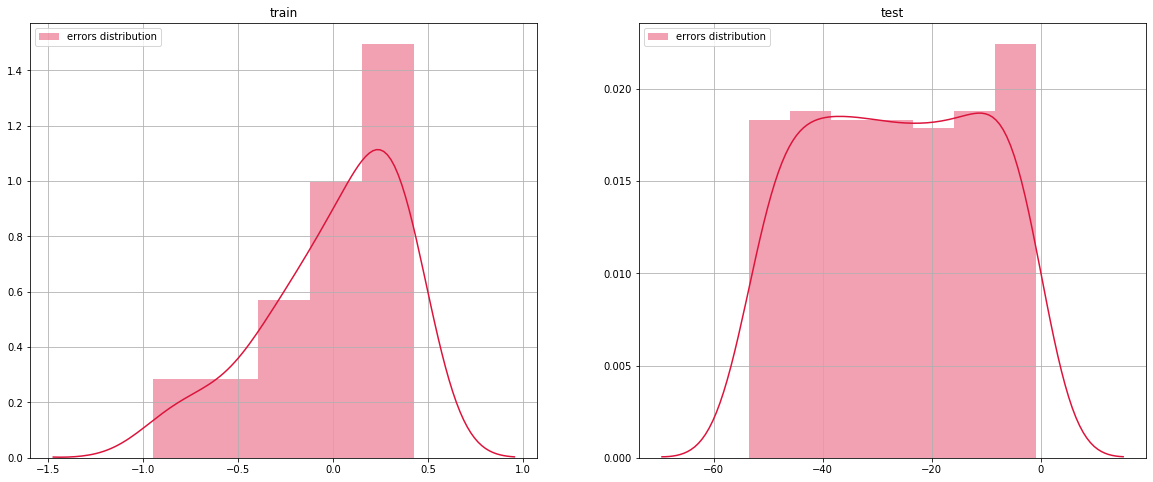

In [11]:
from sklearn.linear_model import LinearRegression

simple_linear_model = LinearRegression()
simple_linear_model.fit(train_data[['days_from_start']], train_data['ln_y'])
alpha_simple, beta_simple = simple_linear_model.intercept_, simple_linear_model.coef_[0]
print(f'alpha: {alpha_simple}, beta: {beta_simple}')

train_data['ln_y_predicted'] = simple_linear_model.predict(train_data[['days_from_start']])
train_data['y_predicted'] = np.exp(train_data['ln_y_predicted']) - shift
test_data['ln_y_predicted'] = simple_linear_model.predict(test_data[['days_from_start']])
test_data['y_predicted'] = np.exp(test_data['ln_y_predicted']) - shift

fig, ax = plt.subplots(1, 2, figsize = (20,8))
train_data.plot(x = 'days_from_start', y = 'ln_y', linewidth = 2,
                ax = ax[0], color = 'darkorchid', label = 'true target');
train_data.plot(x = 'days_from_start', y = 'ln_y_predicted', linewidth = 2,
                ax = ax[0], color = 'forestgreen', label = 'model');

test_data.plot(x = 'days_from_start', y = 'ln_y', linewidth = 2,
                ax = ax[1], color = 'darkorchid', label = 'true target');
test_data.plot(x = 'days_from_start', y = 'ln_y_predicted', linewidth = 2,
                ax = ax[1], color = 'forestgreen', label = 'model');
ax[0].set_title('train')
ax[1].set_title('test')
ax[0].grid();
ax[1].grid();

fig, ax = plt.subplots(1, 2, figsize = (20,8))
sns.distplot(train_data['ln_y'] - train_data['ln_y_predicted'], ax = ax[0],
             color = 'crimson', label = 'errors distribution');
sns.distplot(test_data['ln_y'] - test_data['ln_y_predicted'], ax = ax[1],
             color = 'crimson', label = 'errors distribution');
ax[0].set_title('train')
ax[1].set_title('test')
ax[0].legend();
ax[1].legend();
ax[0].grid();
ax[1].grid();

###### in initial scale

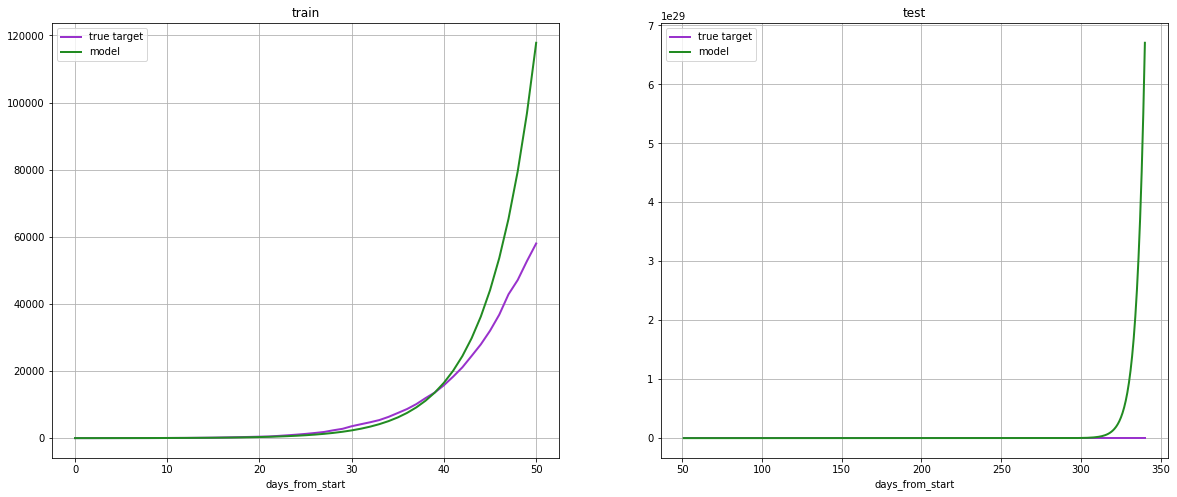

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
train_data.plot(x = 'days_from_start', y = 'total_cases', linewidth = 2,
                ax = ax[0], color = 'darkorchid', label = 'true target');
train_data.plot(x = 'days_from_start', y = 'y_predicted', linewidth = 2,
                ax = ax[0], color = 'forestgreen', label = 'model');

test_data.plot(x = 'days_from_start', y = 'total_cases', linewidth = 2,
                ax = ax[1], color = 'darkorchid', label = 'true target');
test_data.plot(x = 'days_from_start', y = 'y_predicted', linewidth = 2,
                ax = ax[1], color = 'forestgreen', label = 'model');
ax[0].set_title('train')
ax[1].set_title('test')
ax[0].grid();
ax[1].grid();

######  yeah, it doesn't look so good

###### построим Байесовскую линейную регрессию - сначала оценим на очень маленькой подвыборке "априорные" значения дисперсии  шума и средних значений коэффициентов

In [13]:
np.random.seed(8)
pre_train_data = train_data.sample(3)

simple_linear_model = LinearRegression()
simple_linear_model.fit(pre_train_data[['days_from_start']], pre_train_data['ln_y'])

alpha, beta = simple_linear_model.intercept_, simple_linear_model.coef_[0]
sigma = np.sqrt(np.mean((simple_linear_model.predict(pre_train_data[['days_from_start']]) - pre_train_data['ln_y'])**2))

print(f'alpha: {alpha}, beta: {beta}, sigma: {sigma}')

alpha: 1.055420914829278, beta: 0.20856674388419508, sigma: 0.41236828775881834


###### возьмём с лекции часть полезного кода

In [14]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    """
    mu is mean (location) vector for params distr
    sigma is covariance matrix for params distr
    """
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [15]:
mu_init = np.array([alpha, beta])
sigma_init = np.eye(len(mu_init))

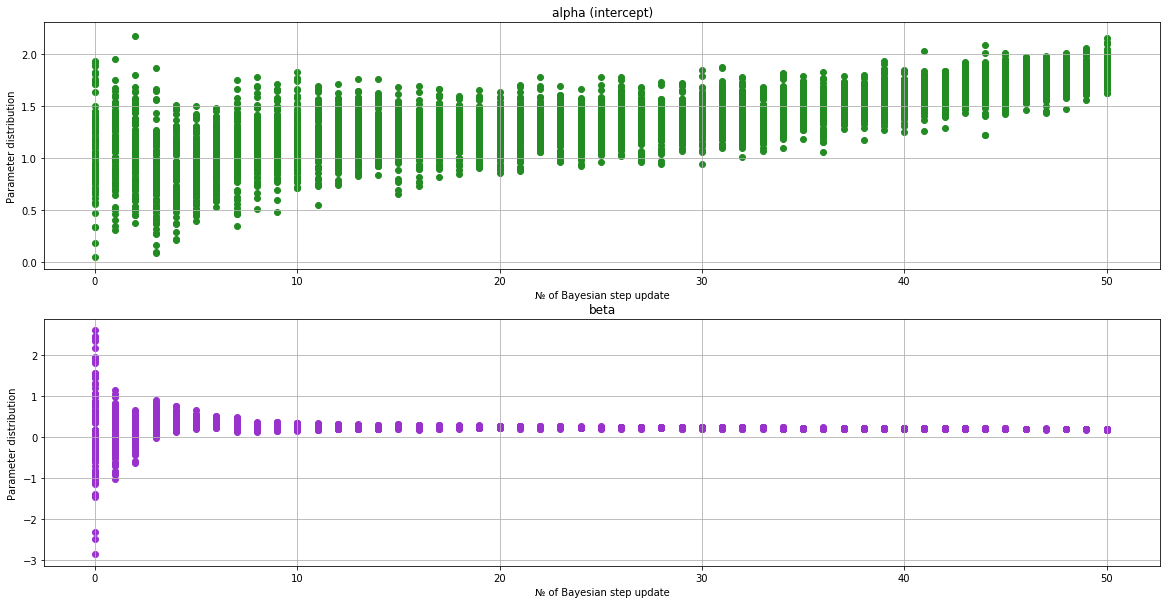

In [16]:
import scipy.stats

mu_current, sigma_current = mu_init, sigma_init

## кормим по одной точке и смотрим, как меняется распределение на каждый из параметров

mu_sequences = [mu_current]
sigma_sequences = [sigma_current]

fig, ax = plt.subplots(2, 1, figsize = (20,10))

for i in range(len(train_data)):

    x = train_data.loc[i,'days_from_start']
    y = train_data.loc[i,'ln_y']

    mu_current, sigma_current = bayesian_update(mu_current, sigma_current, x, y, sigma)

    mu_sequences.append(mu_current)
    sigma_sequences.append(sigma_current)
    
    mvnorm = scipy.stats.multivariate_normal(mu_current, sigma_current)
    rvs = mvnorm.rvs(100)
    alpha_generated, beta_generated = rvs[:,0], rvs[:,1]
    
    ax[0].scatter(x = [i] * len(alpha_generated), y = alpha_generated, color = 'forestgreen')
    ax[1].scatter(x = [i] * len(beta_generated), y = beta_generated, color = 'darkorchid')
    
ax[0].set_title('alpha (intercept)')
ax[1].set_title('beta')
ax[0].set_xlabel('№ of Bayesian step update');
ax[1].set_xlabel('№ of Bayesian step update');
ax[0].set_ylabel('Parameter distribution');
ax[1].set_ylabel('Parameter distribution');
ax[0].grid();
ax[1].grid();

In [17]:
mu_final, sigma_final = mu_sequences[-1], sigma_sequences[-1]
sigma_final = np.diag(sigma_final) * np.eye(len(mu_final)) ### принудительно зануляем внедиагонали в матрице ковариаций

In [18]:
#### в целом, средние похожи на результаты vanilla OLS
mu_final, alpha_simple, beta_simple

(array([1.83893124, 0.196857  ]), 1.8490840448339725, 0.19655538808797077)

#### посэмплируем прогнозные кривые из распределения параметров

In [19]:
def myplot_sample_lines(xs, mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    plt.figure(figsize = (10, 6))
    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs, 'k-', lw=.4, color = 'crimson')
        
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
    plt.grid()

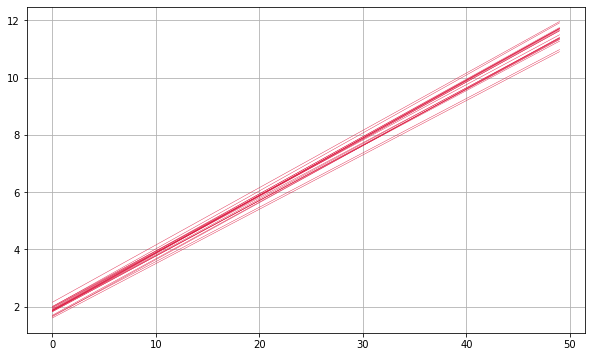

In [20]:
myplot_sample_lines(range(50), mu_final, sigma_final)

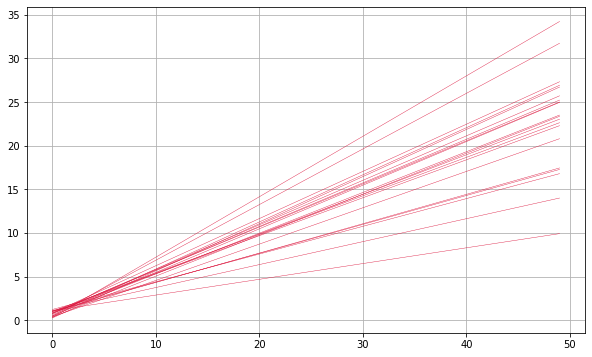

In [21]:
### а если взять шаг где-то в начале 
myplot_sample_lines(range(50),  mu_sequences[5], sigma_sequences[5])

In [22]:
# Нарисуем результат
def plot_predictions(xs, mu, x, points, sigma_noise = 0.25, figsize = (15, 10)):
    
    # sns.set_palette("colorblind")
    palette = sns.color_palette()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
#     ax.set_ylim((-2, 2))
#     ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, mu[1]*xs + mu[0], color="red", label="MAP гипотеза")
    ax.fill_between(xs, mu[1]*xs + mu[0] - sigma_noise, mu[1]*xs + mu[0] + sigma_noise,
                    color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0),
                    color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=10)
    ax.grid()

In [23]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_predictions(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i, w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res

In [24]:
xs = train_data['days_from_start'].values
ys = train_data['ln_y'].values
sampled_predictions = sample_predictions(mu_final, sigma_final, xs, n = 100)

# sigma_noise_reestimated = np.sqrt(np.mean((sampled_predictions.mean(axis = 0) - ys)**2))
sigma_noise_reestimated = np.sqrt(np.mean((mu_final[1] * xs + mu_final[0] - ys)**2))
sigma_noise_reestimated

0.36073183219538013

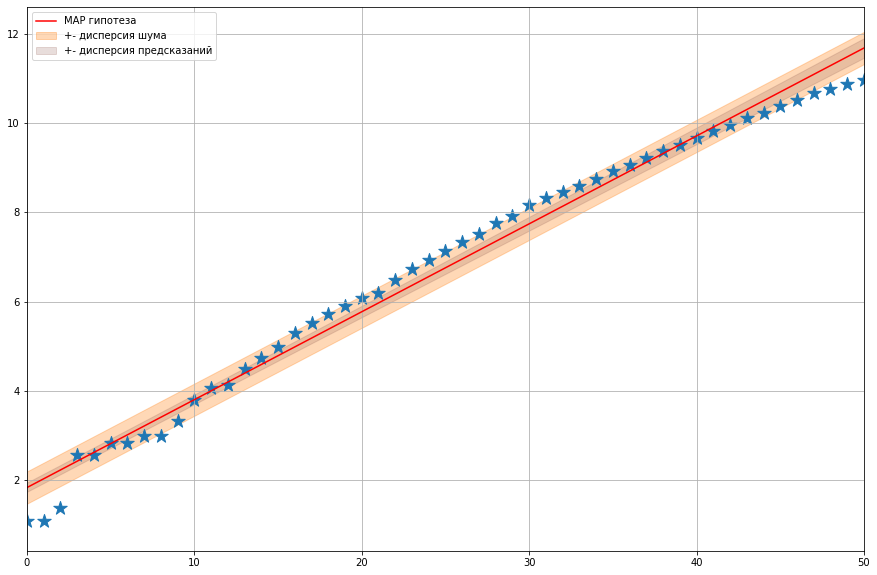

In [25]:
plot_predictions(xs, mu_final, sampled_predictions, [xs, ys], sigma_noise = sigma_noise_reestimated)

####  посчитаем прогнозные распределения на 1мая, 1 июня, 1 сентября

In [26]:
dates_for_forecast = [pd.to_datetime(f'2020-0{m}-01') for m in (5,6,9)]
xs_for_forecast = np.array([(date - pd.to_datetime('2020-03-03')).days for date in dates_for_forecast])

sampled_predictions = sample_predictions(mu_final, sigma_final, xs_for_forecast, n = 1000)
sampled_predictions.shape

(1000, 3)

In [27]:
from functools import partial
quantiles_specified = [.025, 0.5, 0.975]
get_quantiles = partial(np.quantile, q = quantiles_specified)


forecast_at_dates_distribution = pd.DataFrame(np.exp(np.apply_along_axis(get_quantiles, 0, sampled_predictions)) + shift,
                                              columns = dates_for_forecast, index = quantiles_specified)
forecast_at_dates_distribution

,2020-05-01,2020-06-01,2020-09-01
0.025,4.150885e+05,1.475592e+08,5.835765e+15
0.500,6.932933e+05,3.088493e+08,2.266222e+16
0.975,1.146233e+06,6.588472e+08,1.009832e+17


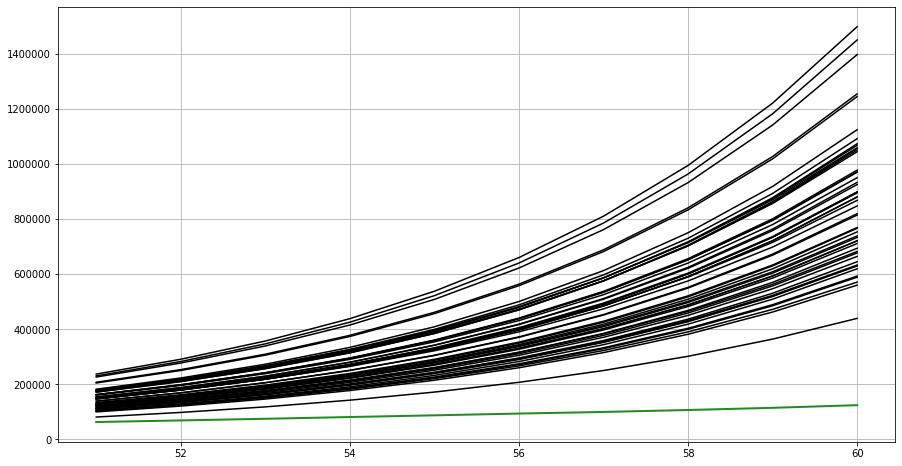

In [28]:
N_first = 10

fssmp = np.exp(sample_predictions(mu_final, sigma_final, test_data['days_from_start'][:N_first], n = 50)  + shift)

plt.figure(figsize = (15,8))
for i in range(50):
    plt.plot(test_data['days_from_start'][:N_first], fssmp[i,:], color = 'k')
plt.plot(test_data['days_from_start'][:N_first], test_data['total_cases'][:N_first], color = 'forestgreen', linewidth = 2);
plt.grid();

###### it's all great but still doesn't fix exponential growth

#### 3

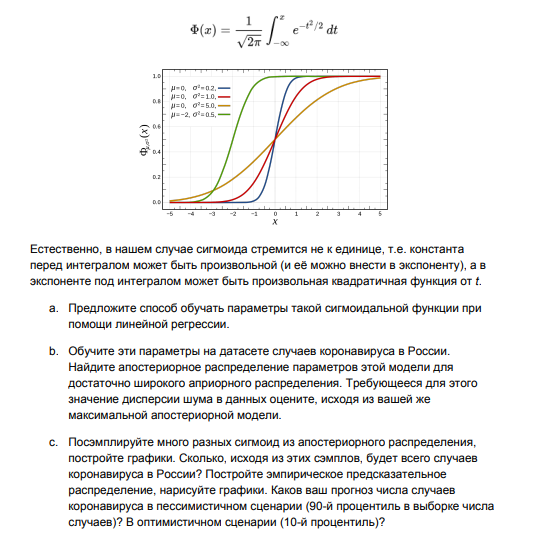

In [29]:
display(Image(r"C:\Users\Admin\Desktop\made\Semester 2\Advanced ML\HW1\3.png", width = 800)) 

Если пробит-функция описывает total_cases(day_number) $ = y(x) = C*\int_{-\infty}^{x}\exp^\frac{-t^2}{2}dt$

То её производная $y'(x) = C*\exp^\frac{-x^2}{2}$

Тогда сводя к предыдущей задаче, можно сначала взять производную total_counts по времени: $(TC(i+1) - TC(i))/(i+1-i)$

Это эквивалентно значению new_cases, поскольку в данных функция определена в целых точках и шаг всегда 1 день

А затем на значениях её логарифма обучить линейную модель на квадратичном полиноме (включая низшие степени, тк в степень во-первых придет та самая константа снаружи, а во-вторых, t^2 можно представить как полный квадрат от некой другой переменной: t = (d-a), где d и есть номер дня)

In [30]:
train_data.drop(['ln_y','ln_y_predicted','y_predicted'], axis = 1, inplace = True)
test_data.drop(['ln_y','ln_y_predicted','y_predicted'], axis = 1, inplace = True)

In [31]:
train_data['x'] = train_data['days_from_start']
train_data['x2'] = train_data['days_from_start'] ** 2
test_data['x'] = test_data['days_from_start']
test_data['x2'] = test_data['days_from_start'] ** 2

shift = 1
train_data['ln_y'] = np.log(train_data['new_cases'] + shift)
test_data['ln_y'] = np.log(test_data['new_cases'] + shift)

###### аналогично, pre-fit to get some "priors"

In [32]:
np.random.seed(8)
pre_train_data = train_data.sample(5)

simple_linear_model = LinearRegression()
simple_linear_model.fit(pre_train_data[['x','x2']], pre_train_data['ln_y'])

alpha, beta, gamma = simple_linear_model.intercept_, *simple_linear_model.coef_
sigma = np.sqrt(np.mean((simple_linear_model.predict(pre_train_data[['x','x2']]) - pre_train_data['ln_y'])**2))

print(f'alpha: {alpha}, beta: {beta}, gamma: {gamma}, sigma: {sigma}')

alpha: -0.13313564980407122, beta: 0.27431616016247773, gamma: -0.0019770642300815434, sigma: 0.09887373549140108


In [33]:
mu_init = np.array([alpha, beta, gamma])
sigma_init = np.eye(len(mu_init))

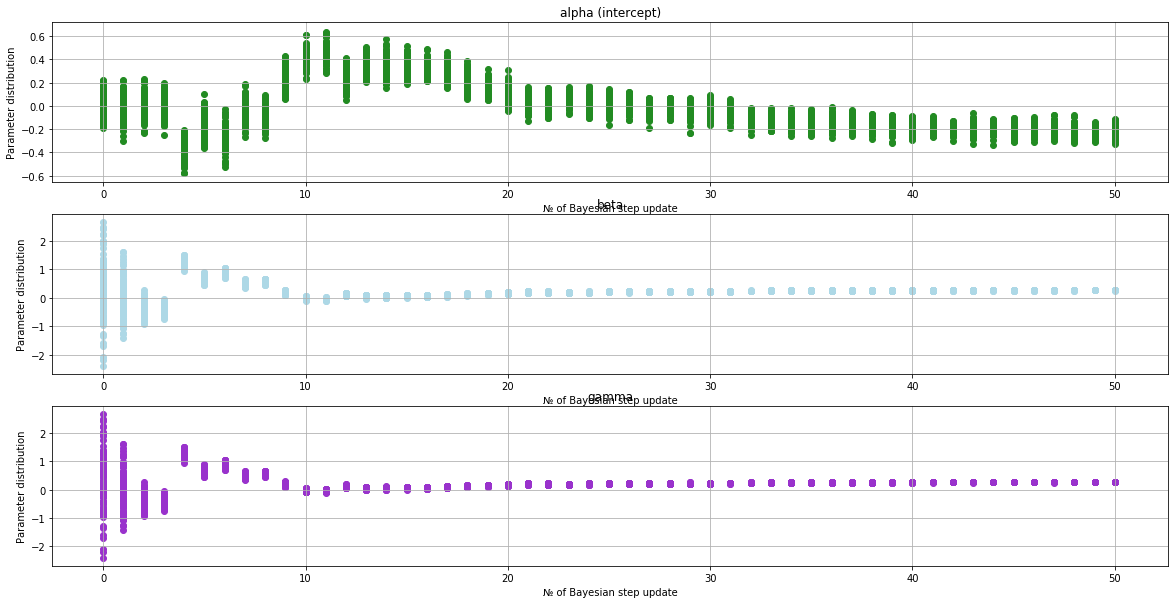

In [34]:
import scipy.stats

def bayesian_update_2(mu, sigma, x, y, sigma_noise=.25):
    """
    mu is mean (location) vector for params distr
    sigma is covariance matrix for params distr
    """
    x_matrix = np.array([[1, *x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

mu_current, sigma_current = mu_init, sigma_init

## кормим по одной точке и смотрим, как меняется распределение на каждый из параметров

mu_sequences = [mu_current]
sigma_sequences = [sigma_current]

fig, ax = plt.subplots(3, 1, figsize = (20,10))

for i in range(len(train_data)):

    x = train_data.loc[i, ['x', 'x2']]
    y = train_data.loc[i,'ln_y']

    mu_current, sigma_current = bayesian_update_2(mu_current, sigma_current, x, y, sigma)

    mu_sequences.append(mu_current)
    sigma_sequences.append(sigma_current)
    
    mvnorm = scipy.stats.multivariate_normal(mu_current, sigma_current)
    rvs = mvnorm.rvs(100)
    alpha_generated, beta_generated, gamma_generated = rvs[:,0], rvs[:,1], rvs[:,2]
    
    ax[0].scatter(x = [i] * len(alpha_generated), y = alpha_generated, color = 'forestgreen')
    ax[1].scatter(x = [i] * len(beta_generated), y = beta_generated, color = 'lightblue')
    ax[2].scatter(x = [i] * len(gamma_generated), y = beta_generated, color = 'darkorchid')
    
ax[0].set_title('alpha (intercept)')
ax[1].set_title('beta')
ax[2].set_title('gamma')
ax[0].set_xlabel('№ of Bayesian step update');
ax[1].set_xlabel('№ of Bayesian step update');
ax[2].set_xlabel('№ of Bayesian step update');
ax[0].set_ylabel('Parameter distribution');
ax[1].set_ylabel('Parameter distribution');
ax[2].set_ylabel('Parameter distribution');
ax[0].grid();
ax[1].grid();
ax[2].grid();

In [35]:
mu_final, sigma_final = mu_sequences[-1], sigma_sequences[-1]
sigma_final = np.diag(sigma_final) * np.eye(len(mu_final)) ### принудительно зануляем внедиагонали в матрице ковариаций

In [36]:
#### в целом, средние похожи на результаты vanilla OLS
mu_final, alpha, beta, gamma

(array([-0.22849078,  0.26724606, -0.00173906]),
 -0.13313564980407122,
 0.27431616016247773,
 -0.0019770642300815434)

#### посэмплируем прогнозные кривые из распределения параметров

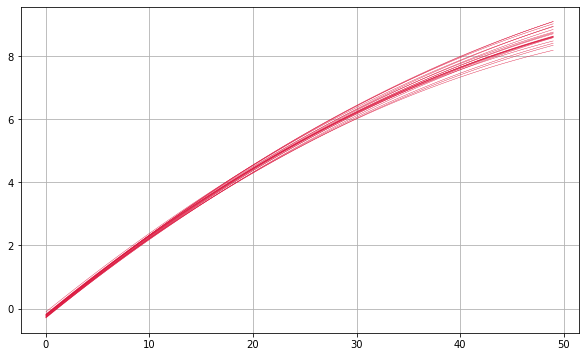

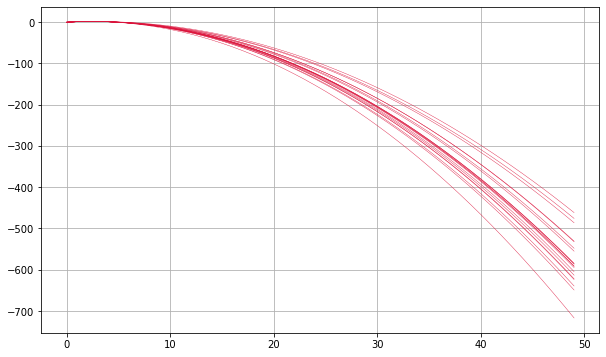

In [37]:
def myplot_sample_curves(xs, mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    plt.figure(figsize = (10, 6))
    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs + w[2]*xs*xs, 'k-', lw=.4, color = 'crimson')
        
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
    plt.grid()

myplot_sample_curves(range(50), mu_final, sigma_final)

### а если взять шаг где-то в начале 
myplot_sample_curves(range(50),  mu_sequences[5], sigma_sequences[5])

In [38]:
# Нарисуем результат
def plot_predictions_2(xs, mu, x, points, sigma_noise = 0.25, figsize = (15, 10)):
    
    # sns.set_palette("colorblind")
    palette = sns.color_palette()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
#     ax.set_ylim((-2, 2))
#     ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, mu[2]*xs*xs + mu[1]*xs + mu[0], color="red", label="MAP гипотеза")
    ax.fill_between(xs, mu[2]*xs*xs + mu[1]*xs + mu[0] - sigma_noise,
                    mu[2]*xs*xs + mu[1]*xs + mu[0] + sigma_noise,
                    color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0),
                    color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=10)
    ax.grid()
    
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_predictions_2(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i, w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs + w[2]*xs*xs
        print(res[i,:])
    return res    

In [39]:
xs = train_data['days_from_start'].values
ys = train_data['ln_y'].values
sampled_predictions = sample_predictions_2(mu_final, sigma_final, xs, n = 100)

# sigma_noise_reestimated = np.sqrt(np.mean((sampled_predictions.mean(axis = 0) - ys)**2))
sigma_noise_reestimated = np.sqrt(np.mean((mu_final[2] * xs * xs + mu_final[1] * xs + mu_final[0] - ys)**2))
sigma_noise_reestimated

[-0.23279526  0.03073131  0.29092138  0.54777497  0.80129206  1.05147266
  1.29831677  1.54182439  1.78199551  2.01883014  2.25232828  2.48248992
  2.70931508  2.93280374  3.1529559   3.36977158  3.58325076  3.79339345
  4.00019965  4.20366936  4.40380257  4.60059929  4.79405952  4.98418326
  5.1709705   5.35442125  5.53453551  5.71131327  5.88475455  6.05485933
  6.22162762  6.38505941  6.54515472  6.70191353  6.85533585  7.00542167
  7.15217101  7.29558385  7.4356602   7.57240005  7.70580342  7.83587029
  7.96260067  8.08599455  8.20605195  8.32277285  8.43615726  8.54620518
  8.6529166   8.75629153  8.85632997]
[-0.19058246  0.07386382  0.33498035  0.59276715  0.84722421  1.09835154
  1.34614914  1.590617    1.83175512  2.06956351  2.30404216  2.53519108
  2.76301026  2.98749971  3.20865942  3.42648939  3.64098964  3.85216014
  4.06000091  4.26451195  4.46569325  4.66354481  4.85806664  5.04925873
  5.23712109  5.42165371  5.6028566   5.78072975  5.95527317  6.12648685
  6.2943708  

0.4909587586810453

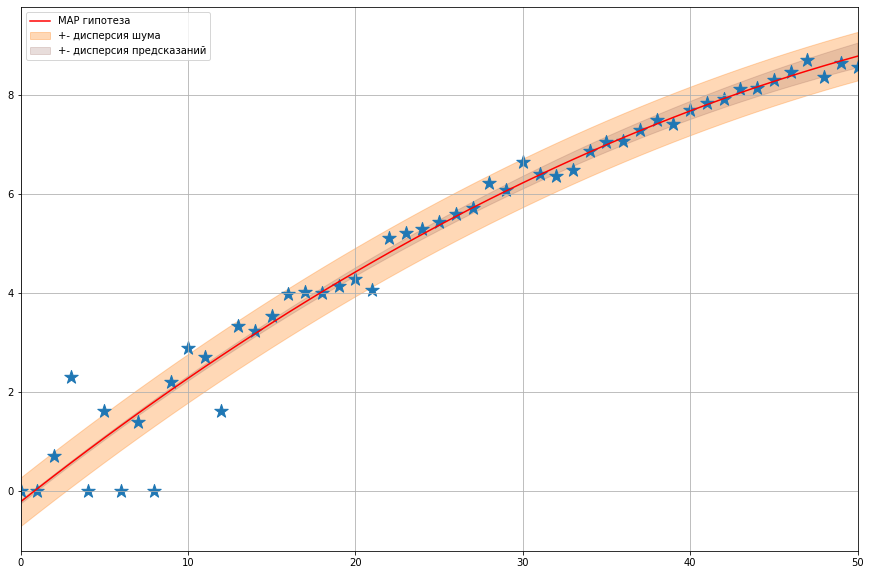

In [40]:
plot_predictions_2(xs, mu_final, sampled_predictions, [xs, ys], sigma_noise = sigma_noise_reestimated)

###### в исходной шкале

In [41]:
def reconstruct_init_value(d, mu):
    return np.sum(np.exp(mu[2]*x*x + mu[1]*x + mu[0]) - shift for x in range(d))

# Нарисуем результат
def plot_predictions_init_scale(xs, mu, x, points, sigma_noise = 0.25, figsize = (15, 10)):
    
    # sns.set_palette("colorblind")
    palette = sns.color_palette()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
#     ax.set_ylim((-2, 2))
#     ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, [reconstruct_init_value(x, mu) for x in xs] , color="red", label="MAP гипотеза")
#     ax.fill_between(xs, mu[2]*xs*xs + mu[1]*xs + mu[0] - sigma_noise,
#                     mu[2]*xs*xs + mu[1]*xs + mu[0] + sigma_noise,
#                     color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0),
                    color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=10)
    ax.grid()
    
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_predictions_init_scale(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i, w in enumerate(my_w):
        res[i,:] = [reconstruct_init_value(x, w) for x in xs]#w[0] + w[1]*xs + w[2]*xs*xs
    return res    

In [42]:
xs = train_data['days_from_start'].values
ys = train_data['total_cases'].values
sampled_predictions = sample_predictions_init_scale(mu_final, sigma_final, xs, n = 100)

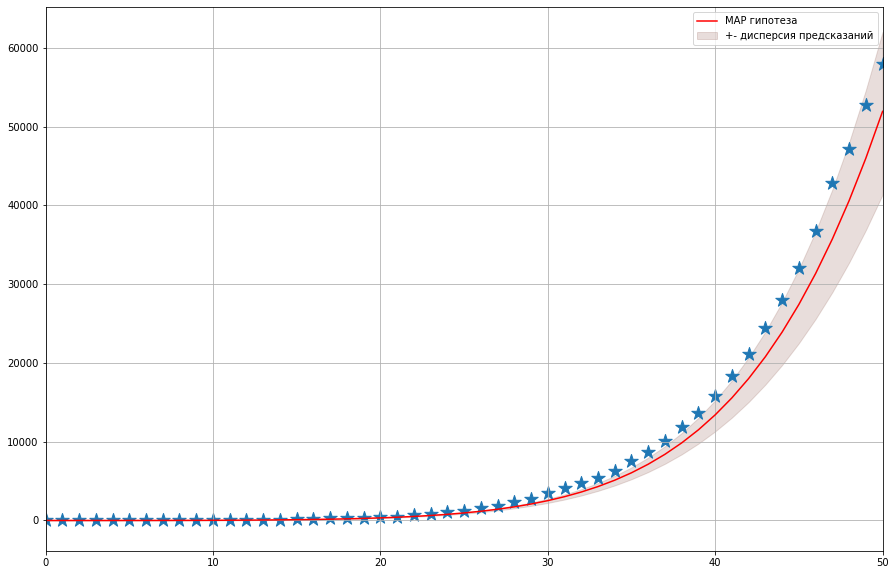

In [43]:
plot_predictions_init_scale(xs, mu_final, sampled_predictions, [xs, ys])

###### на отложенных данных

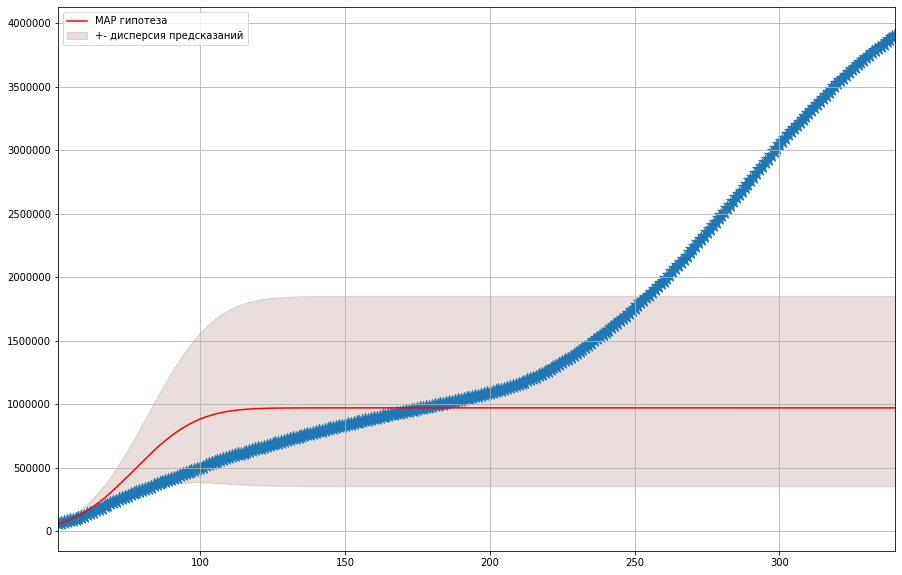

In [44]:
xs = test_data['days_from_start'].values
ys = test_data['total_cases'].values
sampled_predictions = sample_predictions_init_scale(mu_final, sigma_final, xs, n = 100)
plot_predictions_init_scale(xs, mu_final, sampled_predictions, [xs, ys])

####  посчитаем прогнозные распределения на 1мая, 1 июня, 1 сентября

In [45]:
dates_for_forecast = [pd.to_datetime(f'2020-0{m}-01') for m in (5,6,9)]
xs_for_forecast = np.array([(date - pd.to_datetime('2020-03-03')).days for date in dates_for_forecast])

sampled_predictions = sample_predictions_init_scale(mu_final, sigma_final, xs_for_forecast, n = 1000)
sampled_predictions.shape

(1000, 3)

In [46]:
from functools import partial
quantiles_specified = [.025, 0.5, 0.975]
get_quantiles = partial(np.quantile, q = quantiles_specified)

forecast_at_dates_distribution = pd.DataFrame(np.apply_along_axis(get_quantiles, 0, sampled_predictions),
                                              columns = dates_for_forecast, index = quantiles_specified)
forecast_at_dates_distribution

,2020-05-01,2020-06-01,2020-09-01
0.025,83876.027696,3.312412e+05,3.827411e+05
0.500,138664.848172,7.743577e+05,1.011762e+06
0.975,226494.975371,1.865909e+06,3.033013e+06


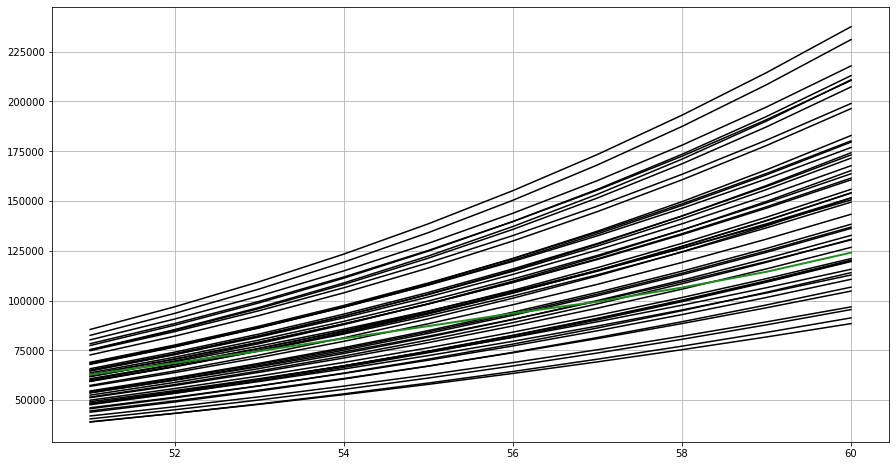

In [47]:
N_first = 10

fssmp = sample_predictions_init_scale(mu_final, sigma_final, test_data['days_from_start'][:N_first], n = 50)

plt.figure(figsize = (15,8))
for i in range(50):
    plt.plot(test_data['days_from_start'][:N_first], fssmp[i,:], color = 'k')
plt.plot(test_data['days_from_start'][:N_first], test_data['total_cases'][:N_first], color = 'forestgreen', linewidth = 2);
plt.grid();